In [1]:
import os 
import re
import pandas as pd

# Import the wordcloud library
from wordcloud import WordCloud

# EDA for LDA
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Convert tonkenized object as a corpus and document
import gensim.corpora as corpora

from pprint import pprint

# Visualise topics
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Draculabites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("allposts.csv")
df.head()

,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,...,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,location,locationId
0,https://www.instagram.com/p/CbZBDq6rRnv/,Today is World Water Day. To raise awareness a...,0,12,2022-03-22T03:23:22.000Z,False,False,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbW1HoSrDt0/,"“Hello, I’m Tinkle Friend! What would you like...",0,36,2022-03-21T07:00:34.000Z,False,False,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CbHbKk2rDGb/,It is World Social Work Day today! We invited ...,1,73,2022-03-15T07:25:10.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/CbHbKk2rDGb/,It is World Social Work Day today! We invited ...,1,73,2022-03-15T07:25:10.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CbHbKk2rDGb/,It is World Social Work Day today! We invited ...,1,73,2022-03-15T07:25:10.000Z,False,True,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check missing aka NO captions
df['description'].isnull().sum()

1

In [4]:
# Preprocessing on captions to make them more amenable for analysis, and reliable results. 
# RegEx to remove any punctuation, and then lowercase the text

# Remove punctuation
df['desc_processed'] = df['description'].str.replace(r'[^\w\s]', '')

# Convert to lowercase
df['desc_processed'] = df['desc_processed'].str.lower()

# Replace null values (no caption) with 'null'
df['desc_processed'].fillna('null', inplace = True)

# Print out the first rows of papers
df['desc_processed'].head()

C:\Users\Draculabites\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    today is world water day to raise awareness ab...
1    hello im tinkle friend what would you like to ...
2    it is world social work day today we invited m...
3    it is world social work day today we invited m...
4    it is world social work day today we invited m...
Name: desc_processed, dtype: object

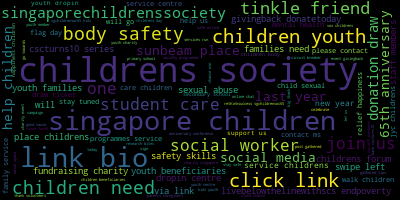

In [5]:
data = list((df['desc_processed']))

def create_cloud(data):
    text = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(text)
    
    return wordcloud
    
wordcloud = create_cloud(data)
# Visualize the word cloud
wordcloud.to_image()

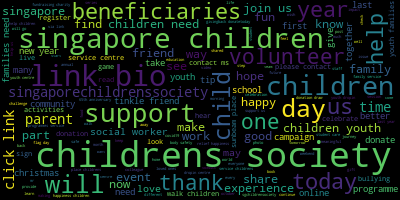

In [6]:
# Join the different distinct processed titles together.
data = list(set(df['desc_processed']))

wordcloud = create_cloud(data)
wordcloud.to_image()

In [7]:
# EDA to transfrom caption into inputs for LDA 

stop_words = stopwords.words('english')
# print(len(stop_words))
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'us', 'like', 'also', 'society', 'societies', 'sgchildren', 
                   'sgchild', 'sgchildrens', 'sgchildrensoc', 'childrens', 'children', 'childs', 'child', 'singapore', 'social'])
# print(len(stop_words))

def to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word.lower() not in stop_words] for doc in texts]

data_words = list(to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words)

[['may', 'new', 'year', 'filled', 'happiness', 'prosperity', 'many', 'precious', 'moments', 'loved', 'ones', '祝大家虎年大吉虎虎生威福虎凌云', 'happy', 'lunar', 'new', 'year'], ['greetings', 'heres', 'wishing', 'hindu', 'friends', 'supporters', 'happy', 'deepavali'], ['comes', 'body', 'safety', 'skills', 'exactly', 'teach', 'highlight', 'key', 'messages', 'parents', 'caregivers', 'relay', 'last', 'teachbodysafety', 'series', 'already', 'teaching', 'body', 'safety', 'leave', 'comment', 'share', 'experience', 'would', 'love', 'hear', 'link', 'bio', 'second', 'series'], ['throwback', 'th', 'anniversary', 'charity', 'gala', 'dinner', 'last', 'thursday', 'distinguished', 'guests', 'donors', 'supporters', 'responded', 'call', 'help', 'need', 'big', 'thank', 'mdm', 'halimah', 'yacob', 'president', 'republic', 'gracing', 'occasion', 'shoutout', 'made', 'event', 'success', 'including', 'host', 'pornsak', 'well', 'broadway', 'beng', 'tay', 'kexin', 'entertained', 'guests', 'help', 'continue', 'work', 'bring', 

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1)], [(2, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(1, 1), (19, 1), (32, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(54, 1), (60, 1), (69, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1),

In [9]:
# LDA model training
# build a model with 5 topics 
# where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic

# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"youth" + 0.008*"link" + 0.007*"centre" + 0.007*"bio" + '
  '0.006*"support" + 0.006*"service" + 0.005*"year" + 0.005*"beneficiaries" + '
  '0.005*"today" + 0.004*"family"'),
 (1,
  '0.007*"youth" + 0.006*"help" + 0.005*"link" + 0.005*"day" + 0.005*"need" + '
  '0.005*"year" + 0.004*"families" + 0.004*"beneficiaries" + 0.004*"bio" + '
  '0.004*"bullying"'),
 (2,
  '0.013*"youth" + 0.009*"bio" + 0.009*"link" + 0.005*"event" + 0.005*"day" + '
  '0.005*"help" + 0.005*"need" + 0.004*"programmes" + 0.004*"year" + '
  '0.004*"walk"'),
 (3,
  '0.007*"help" + 0.006*"today" + 0.006*"year" + 0.005*"day" + 0.005*"support" '
  '+ 0.005*"bio" + 0.005*"need" + 0.005*"new" + 0.004*"link" + '
  '0.004*"families"'),
 (4,
  '0.008*"support" + 0.007*"day" + 0.006*"thank" + 0.005*"help" + '
  '0.005*"family" + 0.005*"today" + 0.005*"beneficiaries" + 0.004*"need" + '
  '0.004*"youth" + 0.004*"volunteers"')]


In [10]:
# Analyzing LDA model results
# Visualise for interpretability

# Better understanding and interpreting individual topics
    # manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
# Better understanding the relationships between the topics.
    # Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+ str(num_topics))

if True:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\Draculabites\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.007001 -0.021677       1        1  27.079331
4      0.009098  0.020960       2        1  22.481212
0     -0.052515  0.009441       3        1  18.597334
1      0.019997 -0.040176       4        1  17.201979
3      0.030420  0.031451       5        1  14.640144, topic_info=         Term        Freq       Total Category  logprob  loglift
321     youth  222.000000  222.000000  Default  30.0000  30.0000
8         new   59.000000   59.000000  Default  29.0000  29.0000
454  bullying   30.000000   30.000000  Default  28.0000  28.0000
483      back   45.000000   45.000000  Default  27.0000  27.0000
498    centre   92.000000   92.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
102      make   10.791441   68.923899   Topic5  -5.8596   0.0672
60      event   11.948452   96.084805   Topic5  -5.7578  -0.1632
321     youth   14.054886  222.503511   Topic5  -5.5954  -0.8406
434    please   10.585549   72.279342   Topic5  -5.8789   0.0004
54    charity   10.395255   71.600924   Topic5  -5.8970  -0.0084

[424 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2086      1  0.581412  admission
2086      2  0.193804  admission
2086      3  0.193804  admission
3379      2  0.307345      adopt
3379      5  0.614690      adopt
...     ...       ...        ...
321       2  0.112358      youth
321       3  0.283142      youth
321       4  0.148312      youth
321       5  0.062920      youth
3092      1  0.774740     zaobao

[877 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])